In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/TrainAndValid.csv',
                 low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

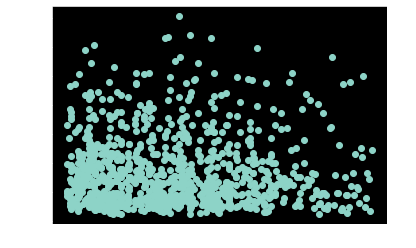

In [4]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

<AxesSubplot:ylabel='Frequency'>

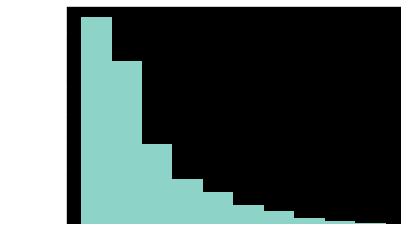

In [5]:
df['SalePrice'].plot.hist()

### Parsing Dates

When we work with time series data, we want to enrich time and date component as much as possible.

We can do this by telling pandas which of our columns has dates in it using the `parse_dates` parameters

In [6]:
df = pd.read_csv('Datasets/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [7]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

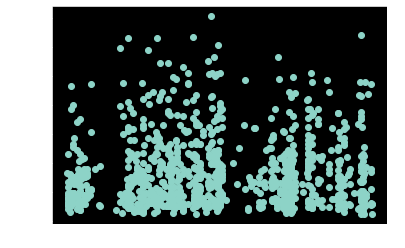

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [9]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [10]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)

### sorting date

In [11]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make copy of original data

In [12]:
df_temp = df.copy()

In [13]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saledayofweek"] = df_temp.saledate.dt.dayofweek
df_temp["saledayofyear"] = df_temp.saledate.dt.dayofyear


In [14]:
df_temp.drop('saledate', axis=1, inplace=True)

In [15]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [16]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [17]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

### Save our preproceseed data 

In [19]:
# Export our temp data into our folder

df_temp.to_csv('Datasets/train_temp-buldozer.csv',
          index=False)

### Try import our preprocessed data

In [20]:
df_temp = pd.read_csv('Datasets/train_temp-buldozer.csv',
                      low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Dealing with Missing Values

### First deal with numeric values

In [21]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saledayofweek
saledayofyear


In [22]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [23]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+'_is missing'] = pd.isnull(content)
            df_temp[label] = content.fillna(content.median)

In [24]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+'_is missing'] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes+1

In [25]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is missing     0
Blade_Type_is missing           0
Travel_Controls_is missing      0
Differential_Type_is missing    0
Steering_Controls_is missing    0
Length: 103, dtype: int64

### Fiting the Model

In [26]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

In [27]:
# model.score(df_temp.drop('SalePrice', axis=1), df_temp['SalePrice'])

### Spliting Data

In [28]:
# Split data in validation and train set

df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

In [29]:
len(df_train), len(df_val)

(401125, 11573)

In [30]:
X_train, Y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, Y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(Y_train, train_preds),
              "Valid MAE": mean_absolute_error(Y_valid, val_preds),
              "Trining RMSLE": rmsle(Y_train, train_preds),
              "Valid_RMSLE": rmsle(Y_valid, val_preds),
              "Training R^2": r2_score(Y_train, train_preds),
              "Valid R^2": r2_score(Y_valid, val_preds)}
    return scores

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000,
                              random_state=42)

In [33]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [34]:
show_scores(model)

{'Training MAE': 5569.966734384545,
 'Valid MAE': 7177.30513522855,
 'Trining RMSLE': 0.25815692814889707,
 'Valid_RMSLE': 0.2932676701203707,
 'Training R^2': 0.8604244776147991,
 'Valid R^2': 0.8317275337770736}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features":[0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter = 2,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_model.best_params_

{'n_estimators': 510,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [37]:
show_scores(rs_model)

{'Training MAE': 7010.175516653667,
 'Valid MAE': 8147.8813080454665,
 'Trining RMSLE': 0.31144781076743155,
 'Valid_RMSLE': 0.32887183509035955,
 'Training R^2': 0.7905558024167598,
 'Valid R^2': 0.7904677498682715}

In [38]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, Y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [39]:
show_scores(ideal_model)

{'Training MAE': 2968.4373424129312,
 'Valid MAE': 6033.683486362386,
 'Trining RMSLE': 0.14500253799740906,
 'Valid_RMSLE': 0.24862303214648593,
 'Training R^2': 0.9584298501014805,
 'Valid R^2': 0.8783627523124771}

In [40]:
df_test = pd.read_csv('Datasets/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Preprocessing the test data
#### As our test data is not in same format as our train data

In [42]:
## create a function for our missing 

def preprocessing(df):
    #convert date into ml acceptable form
    
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saledayofweek"] = df.saledate.dt.dayofweek
    df["saledayofyear"] = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    # Filling numerical missing value with median
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+'_is missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median)
    
    
    #Filling categorical missing data into categorical number 
    
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    
    
    return df

In [43]:
df_test = preprocessing(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is missing,Stick_Length_is missing,Thumb_is missing,Pattern_Changer_is missing,Grouser_Type_is missing,Backhoe_Mounting_is missing,Blade_Type_is missing,Travel_Controls_is missing,Differential_Type_is missing,Steering_Controls_is missing
0,1227829,1006309,3168,121,3,1999,1,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,2,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,3,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,4,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,5,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [52]:
X_train.shape, df_test.shape

((401125, 102), (12457, 101))

In [49]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is missing'}

In [53]:
## Fill auctioneerID_is missing manually to our test data sets

df_test["auctioneerID_is missing"] = False

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is missing,Thumb_is missing,Pattern_Changer_is missing,Grouser_Type_is missing,Backhoe_Mounting_is missing,Blade_Type_is missing,Travel_Controls_is missing,Differential_Type_is missing,Steering_Controls_is missing,auctioneerID_is missing
0,1227829,1006309,3168,121,3,1999,1,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,2,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,3,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,4,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,5,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [55]:
test_preds = ideal_model.predict(df_test)
test_preds

C:\Users\afaqu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([21277.72731027, 20555.21332255, 48055.75988978, ...,
       13292.87506165, 16928.19020022, 31875.31460926])

In [57]:
df_preds = pd.DataFrame()
df_preds["SalesId"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesId,SalesPrice
0,1227829,21277.727310
1,1227844,20555.213323
2,1227847,48055.759890
3,1227848,60972.307484
4,1227863,45048.611757
...,...,...
12452,6643171,46058.229502
12453,6643173,22570.037723
12454,6643184,13292.875062
12455,6643186,16928.190200


In [58]:
df_preds.to_csv("Datasets/test_prediction.csv")

### Feature Importance

In [60]:
# Find the feature importance of our best mode
len(ideal_model.feature_importances_)

102

In [66]:
# Helper function for ploting our data
def ploting(columns, importance, n=20):
    df = (pd.DataFrame({"feature":columns,
                        "feture_importance":importance})
          .sort_values("feture_importance", ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    
    ax.barh(df["feature"][:n], df["feture_importance"][:n])
    ax.set_ylabel("Feature")
    ax.set_xlabel("Fature Importance")
    ax.invert_yaxis()


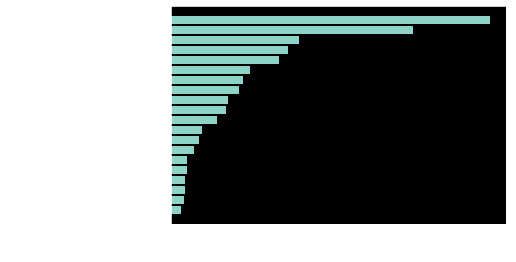

In [67]:
ploting(X_train.columns, ideal_model.feature_importances_)